In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz
from scipy.fft import fft, ifft, fftfreq

from Signal import generateSinWave, generateSquareWave
from Filter import FIRFilter

In [15]:
samplingF = 75000
duration = 1
n = 2048

# Составляющие сигнала {freq: amp}
freqParts = {
  500: 1,
  1000: 5,
  2000: 3,
  5000: 7,
  7000: 3,
  9000: 2,
  12000: 1
}

### Генерация входного сигнала

In [16]:
testSignal = np.zeros((n,))

for (f, a) in freqParts.items():
  testSignal += generateSinWave(f, 0.0, a, samplingF, n)

График сигнала

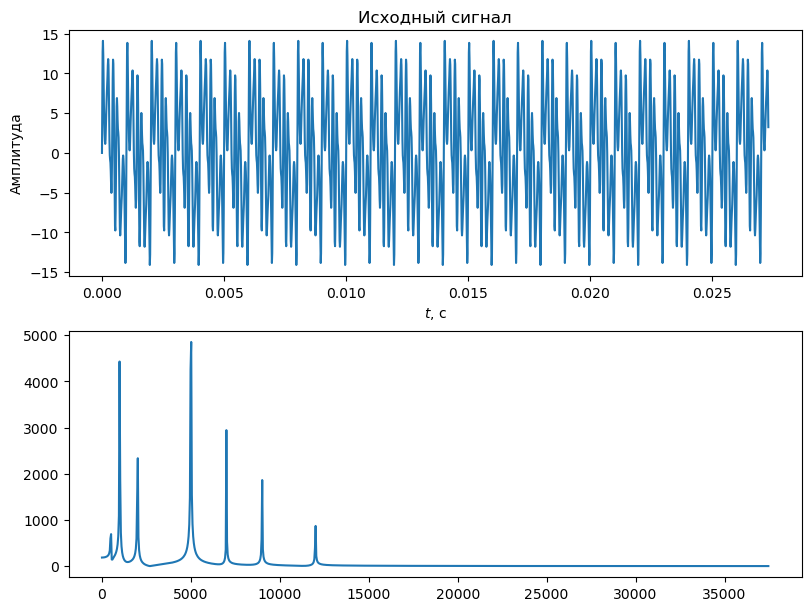

In [17]:
x = np.linspace(0, 1/samplingF*n, n)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), layout="constrained")

ax1.set_title("Исходный сигнал")
ax1.set_ylabel("Амплитуда")
ax1.set_xlabel(r"$t$, c")

ax1.plot(x, testSignal)
ax2.plot(fftfreq(n, 1/samplingF)[:n//2], np.abs(fft(testSignal)[:n//2]))

### Генерация коэффициентов фильтра 

In [18]:
lowpassTaps  = [8, 26, 79, 127]
bandstopTaps = [7, 15, 31, 63]

lowpassCoefs  = {}
bandstopCoefs = {}

cutoffFreqL = 1000
cutoffFreqH = 7000


for el in lowpassTaps:
  lowpassCoefs[el] = firwin(el, cutoffFreqL, fs=samplingF)

for el in bandstopTaps:
  bandstopCoefs[el] = firwin(el, [cutoffFreqL, cutoffFreqH], fs=samplingF)




АЧХ и ФЧХ фильтров

Text(0.5, 1.0, 'АЧХ и ФЧХ фильтра нижних частот')

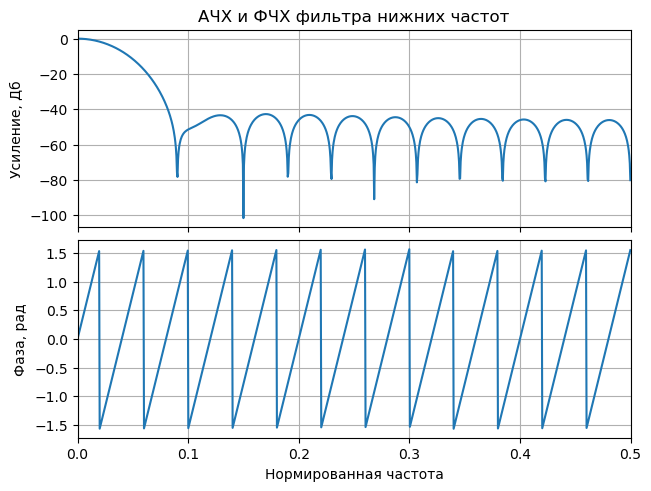

In [23]:
chosenDepth = 26
chosenCoeffs = lowpassCoefs[chosenDepth]
filt = FIRFilter(chosenCoeffs, samplingF)

filt_afr = 20 * np.log10(np.abs(filt.getAFR()))
filt_pfr = filt.getPFR()
x = np.linspace(0, 1, n)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, layout="constrained")

ax1.plot(x[:n//2], filt_afr[:n//2])
ax1.set_ylabel("Усиление, Дб")
ax1.set_xlim((0, 0.5))
ax1.grid()

ax2.plot(x[:n//2], np.unwrap(filt_pfr[:n//2]))
ax2.set_ylabel("Фаза, рад")
ax2.grid()

ax2.set_xlabel("Нормированная частота")
ax1.set_title("АЧХ и ФЧХ фильтра нижних частот")

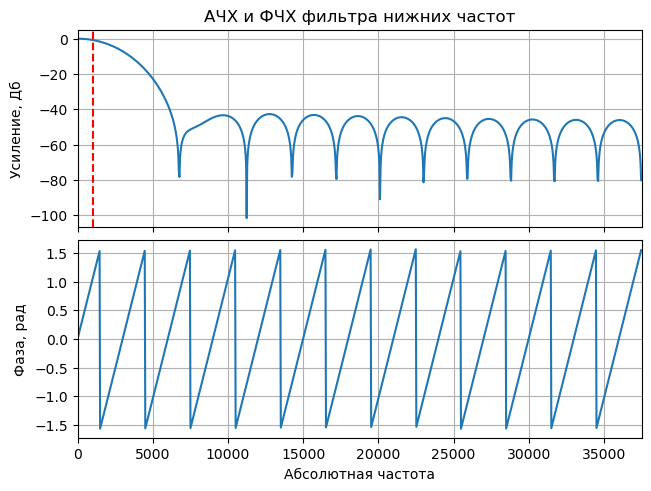

In [24]:
x = fftfreq(n, 1/samplingF)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, layout="constrained")

ax1.plot(x[:n//2], filt_afr[:n//2])
ax1.set_ylabel("Усиление, Дб")
ax1.set_xlim((0, samplingF//2))
ax1.grid()

ax2.plot(x[:n//2], np.unwrap(filt_pfr[:n//2]))
ax2.set_ylabel("Фаза, рад")
ax2.grid()

ax2.set_xlabel("Абсолютная частота")
ax1.set_title("АЧХ и ФЧХ фильтра нижних частот")

ax1.axvline(cutoffFreqL, color="red", linestyle = "--")

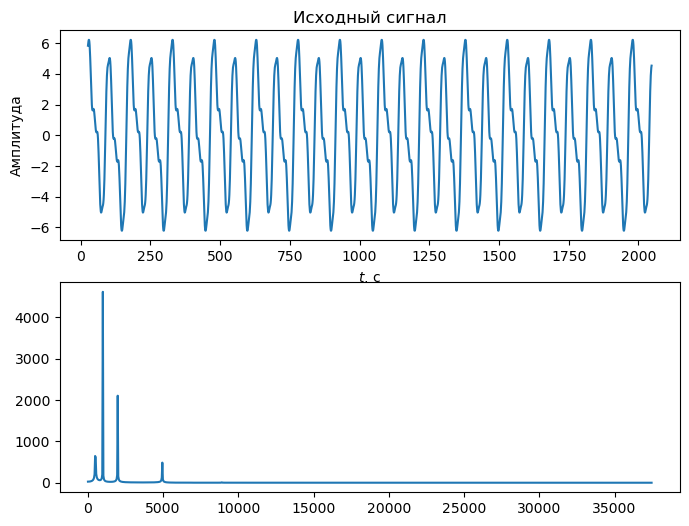

In [25]:
filteredSignal = filt.filterSignal(testSignal)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.set_title("Исходный сигнал")
ax1.set_ylabel("Амплитуда")
ax1.set_xlabel(r"$t$, c")

ax1.plot(range(chosenDepth, n), filteredSignal)
ax2.plot(fftfreq(n, 1/samplingF)[:n//2], np.abs(fft(filteredSignal)[:n//2]))

In [ ]:
goldenSignal = np.array((n, ))

for el in list(filter(lambda x: x < cutoffFreqL, list(freqParts.keys()))):
  goldenSignal += generateSinWave(el, 0, freqParts[el], samplingF, n)

[500]

ValueError: x and y must have same first dimension, but have shapes (2048,) and (2022,)

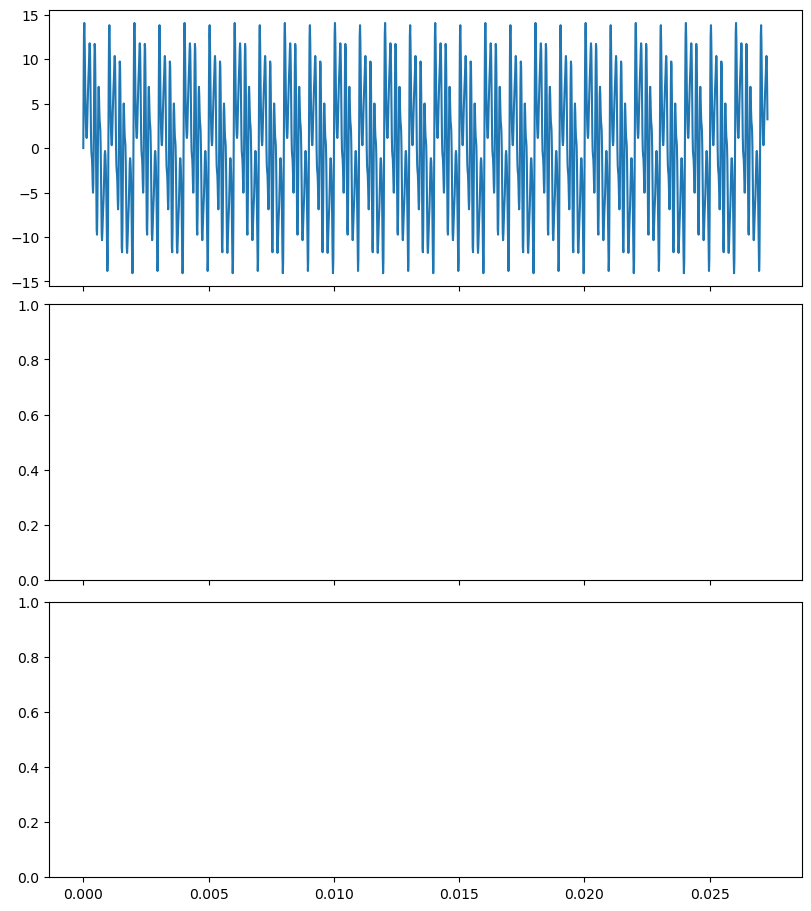

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, layout="constrained", figsize=(8, 9))
x = np.linspace(0, 1/samplingF*n, n)

ax0.plot(x, testSignal)
ax1.plot(x[chosenDepth], filteredSignal)
ax2.plot(x, goldenSignal)